# 1.4.12 Template Matching

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('mario.jpg',0)
img2 = img.copy() 
template = cv2.imread('coin.png',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
    'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

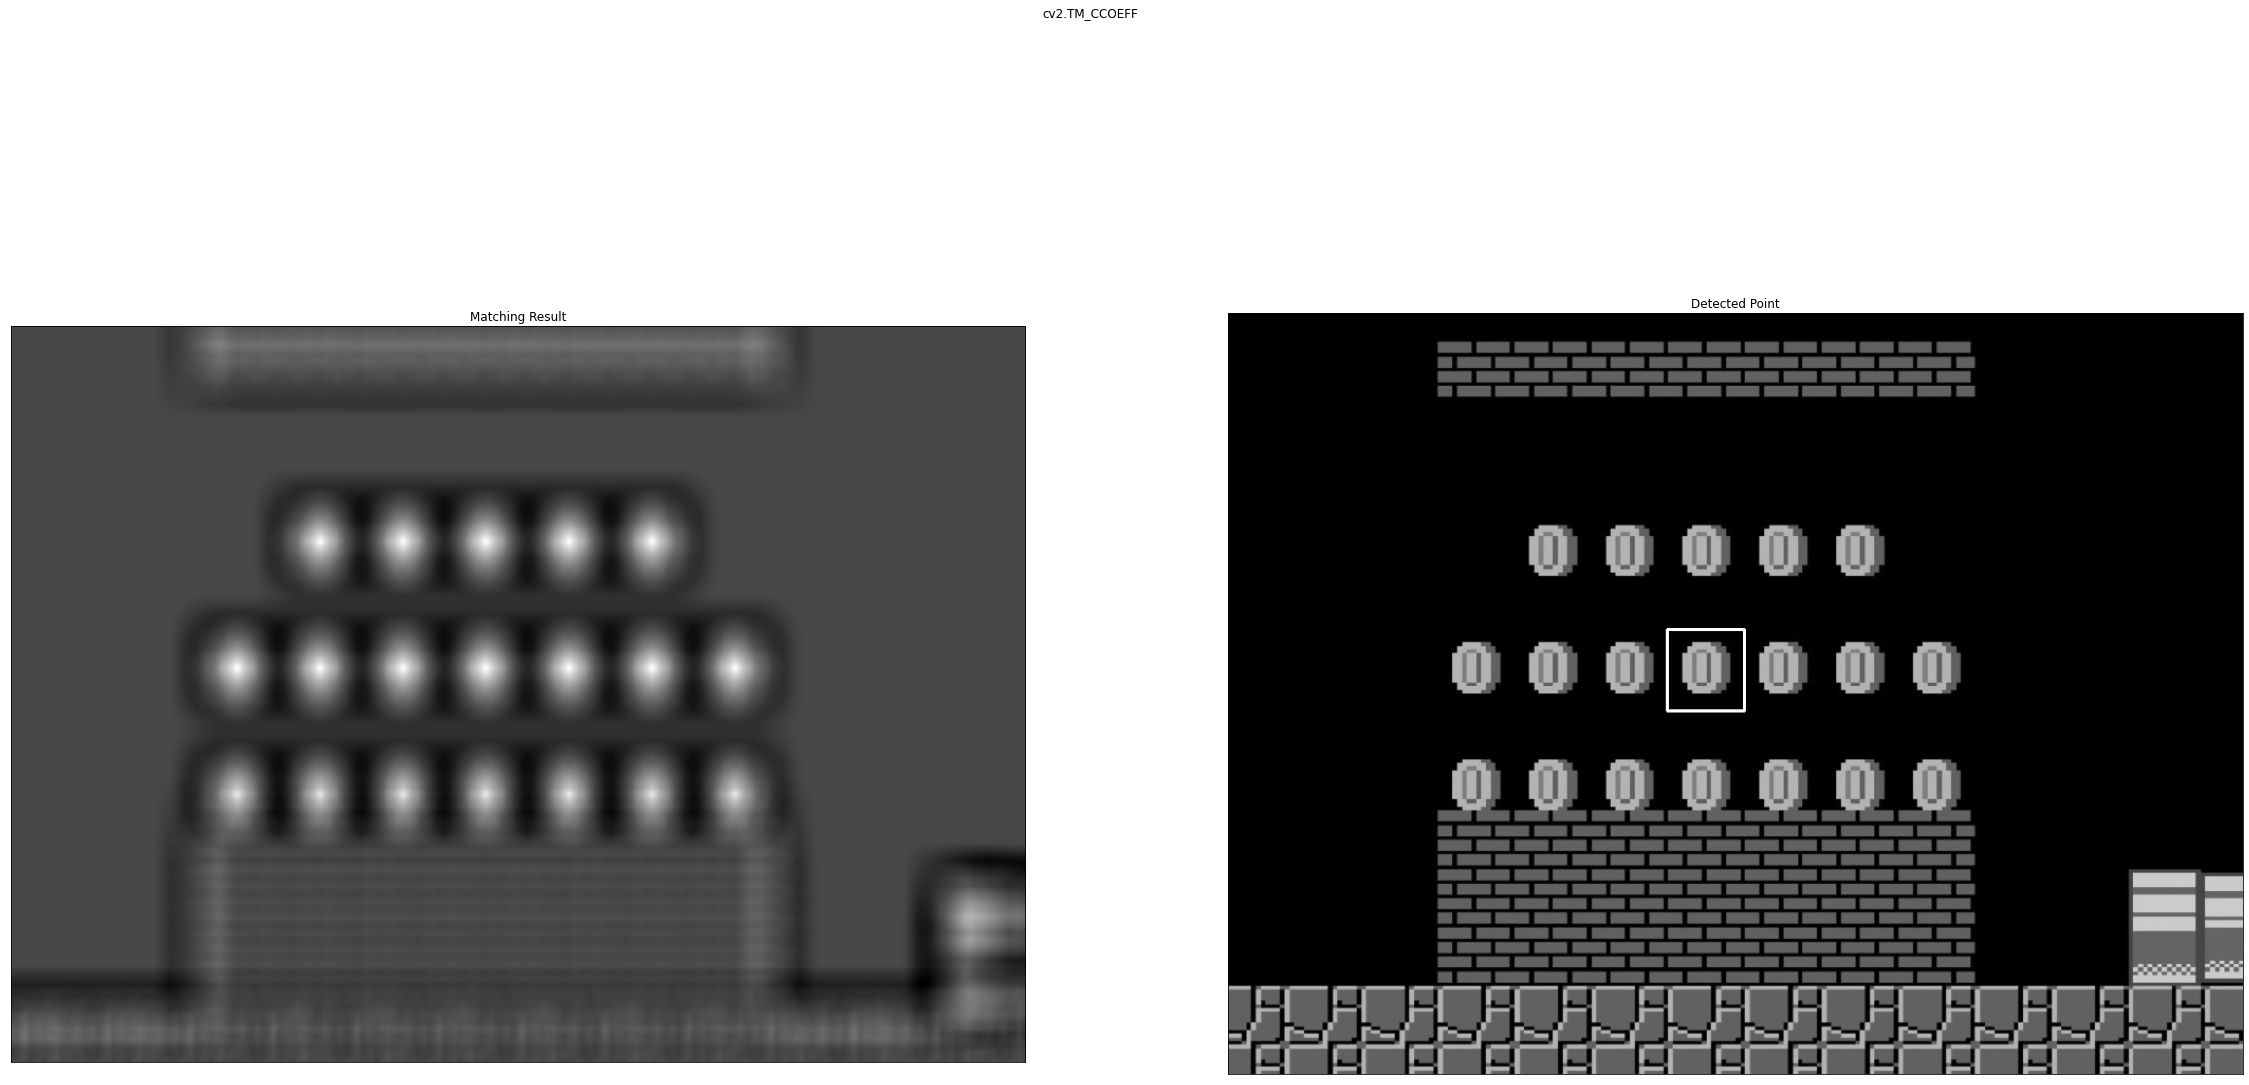

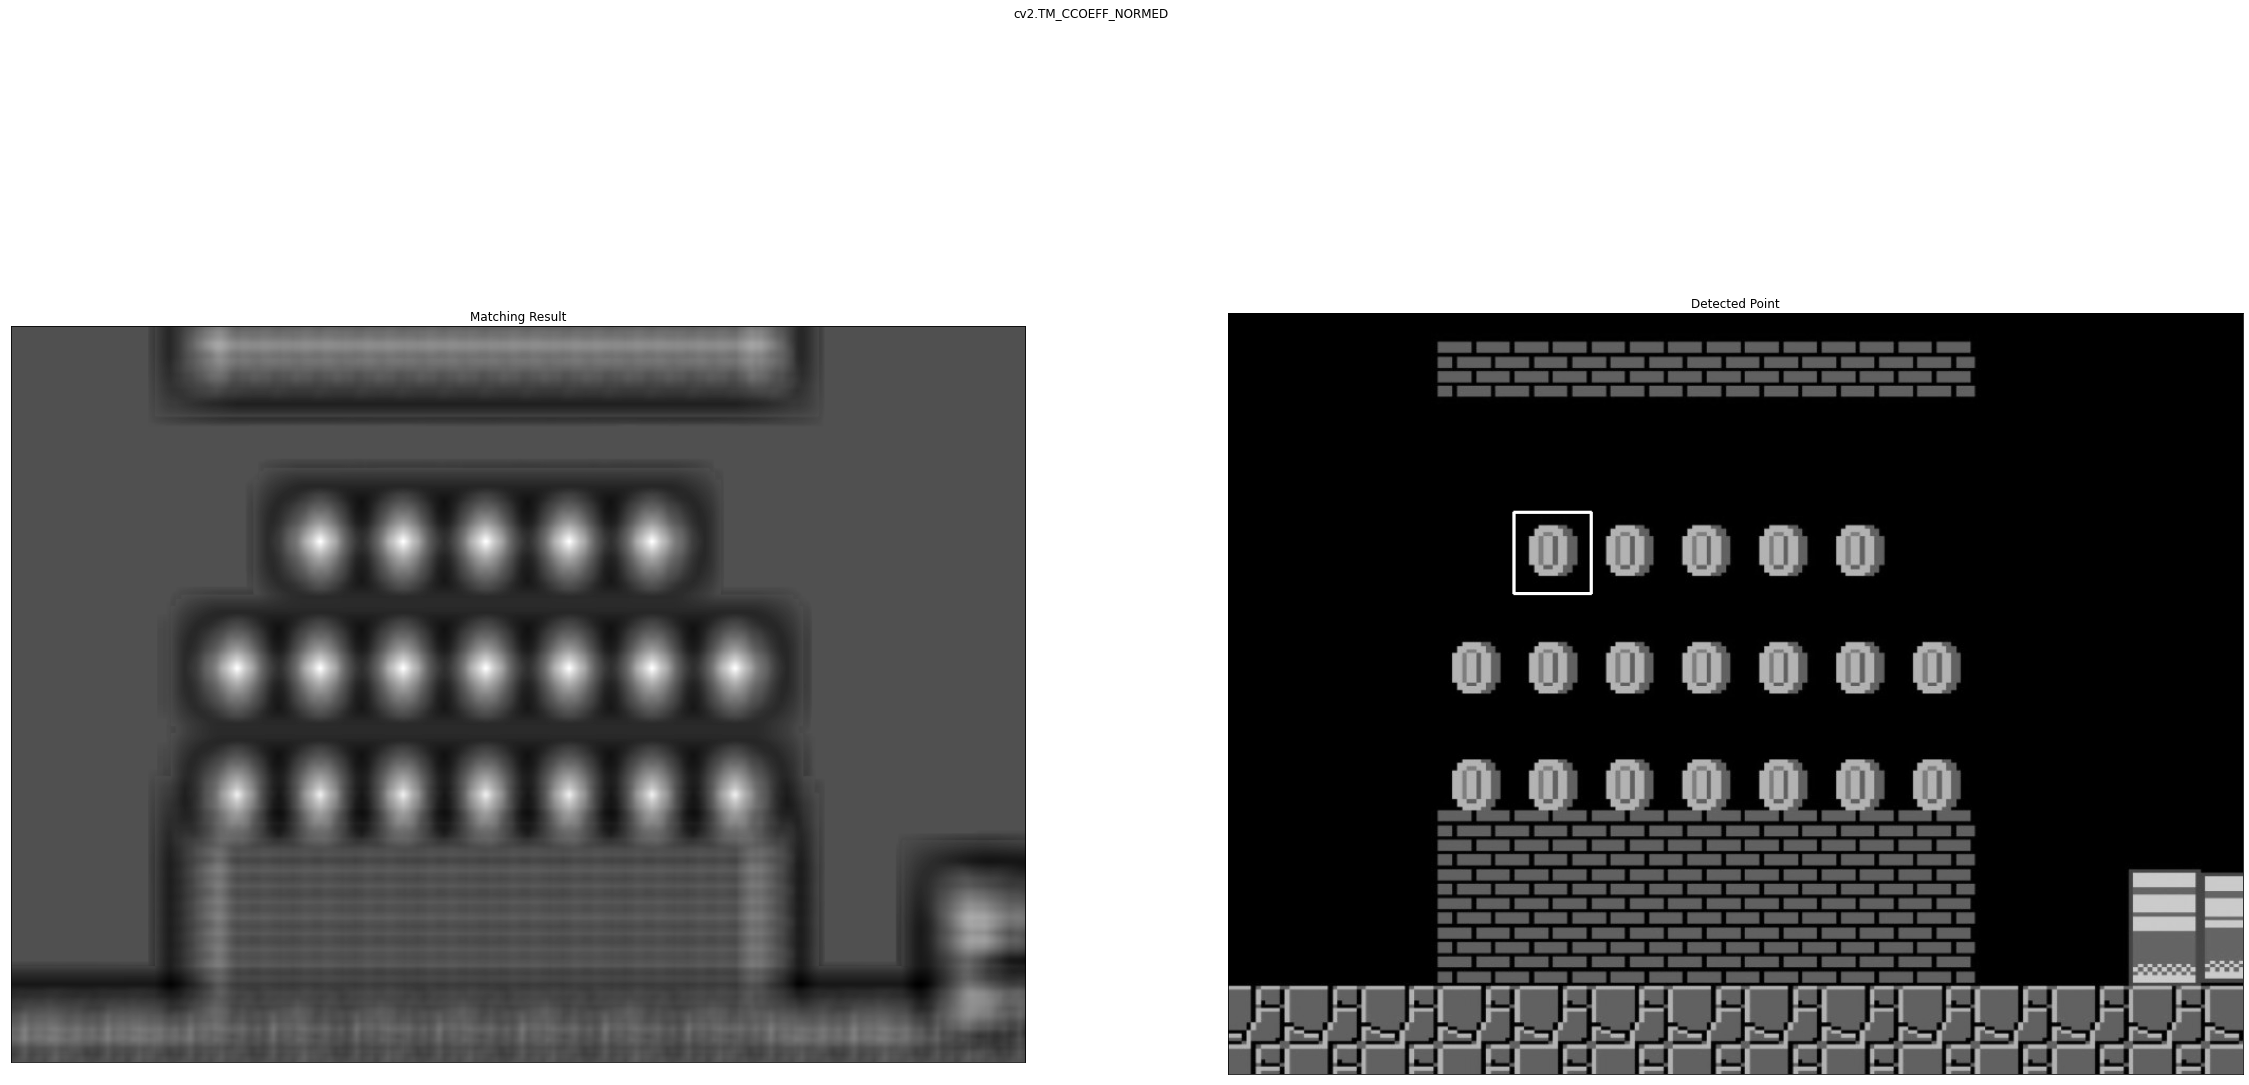

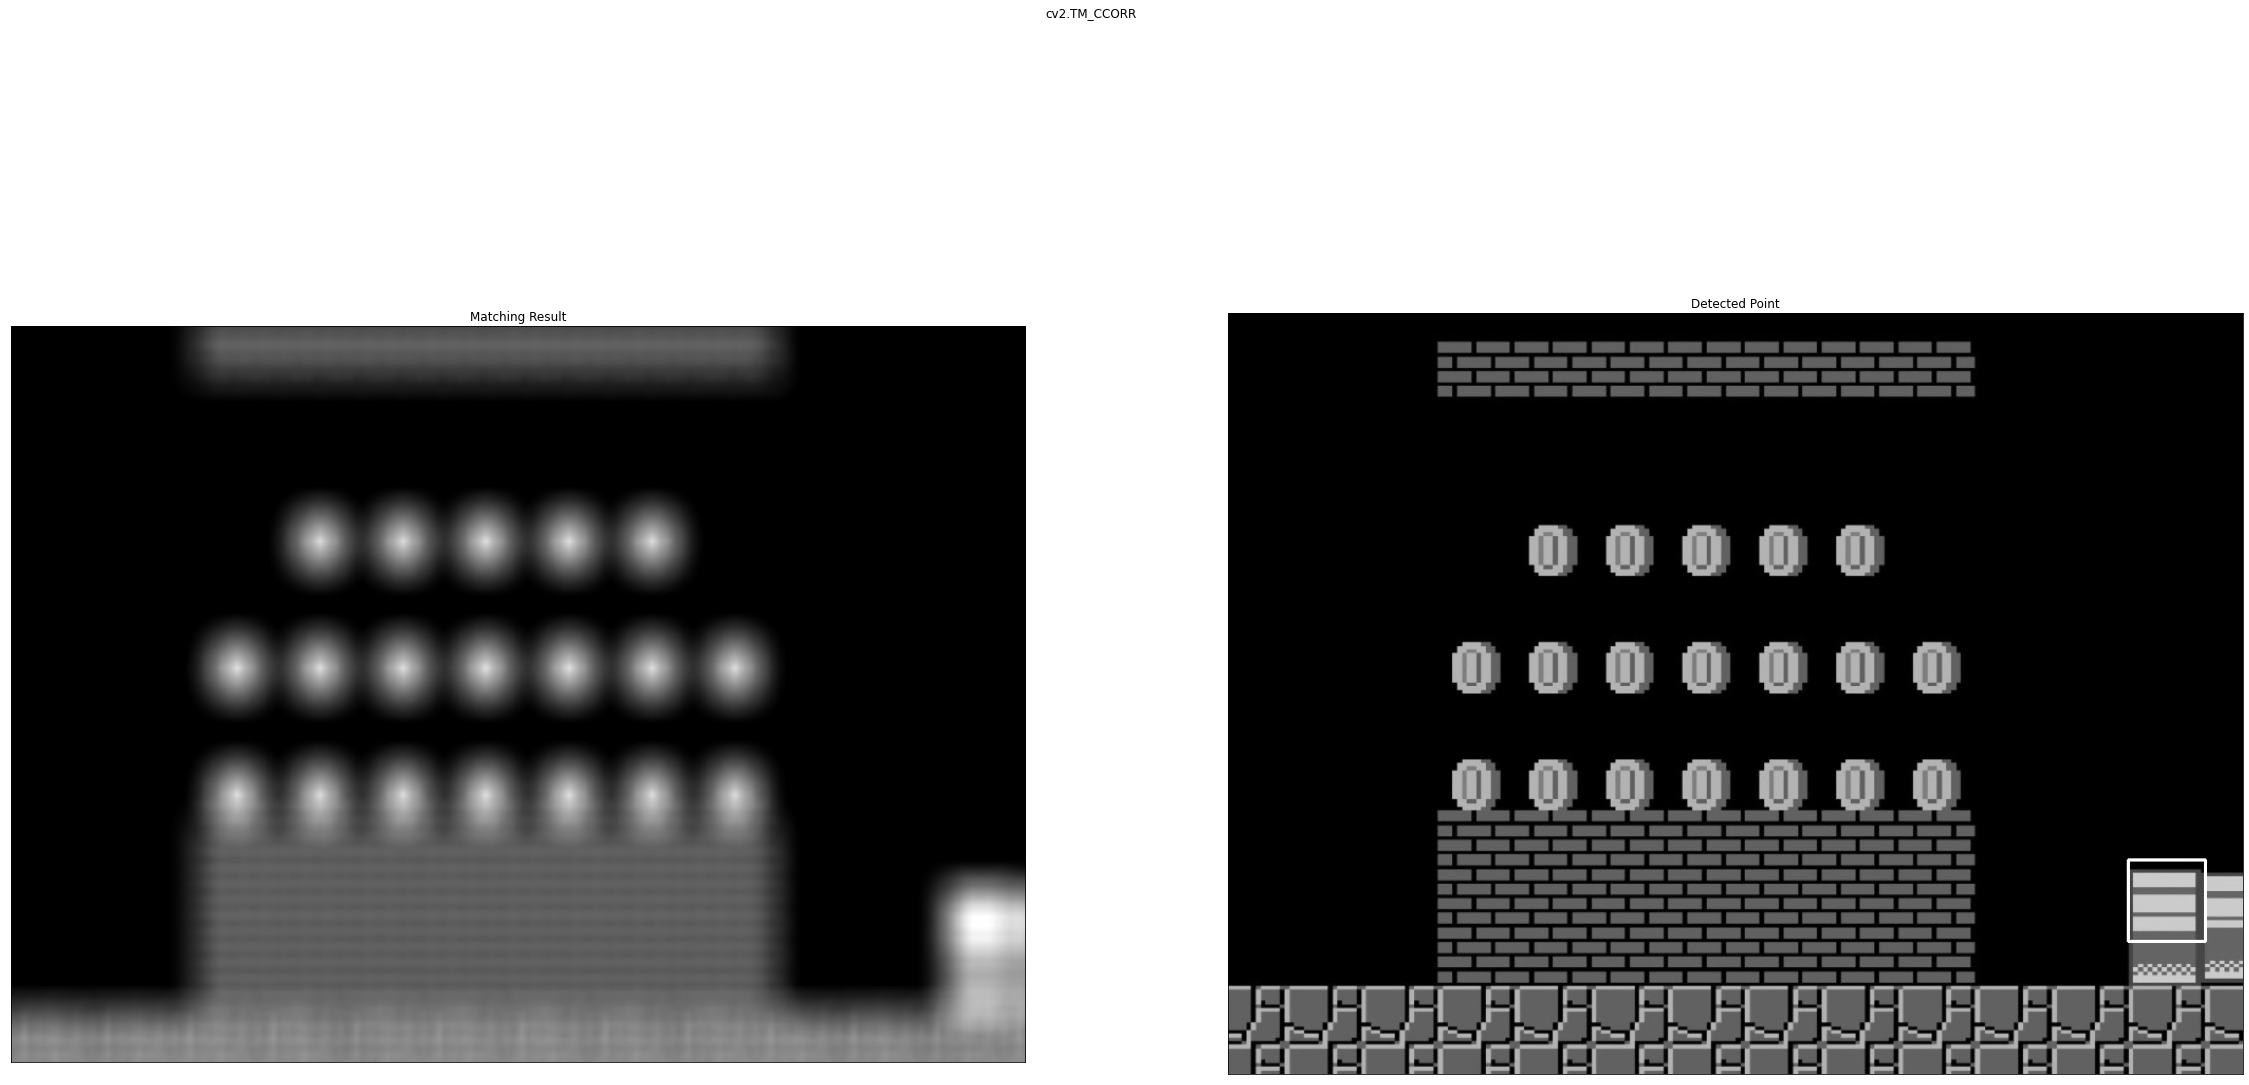

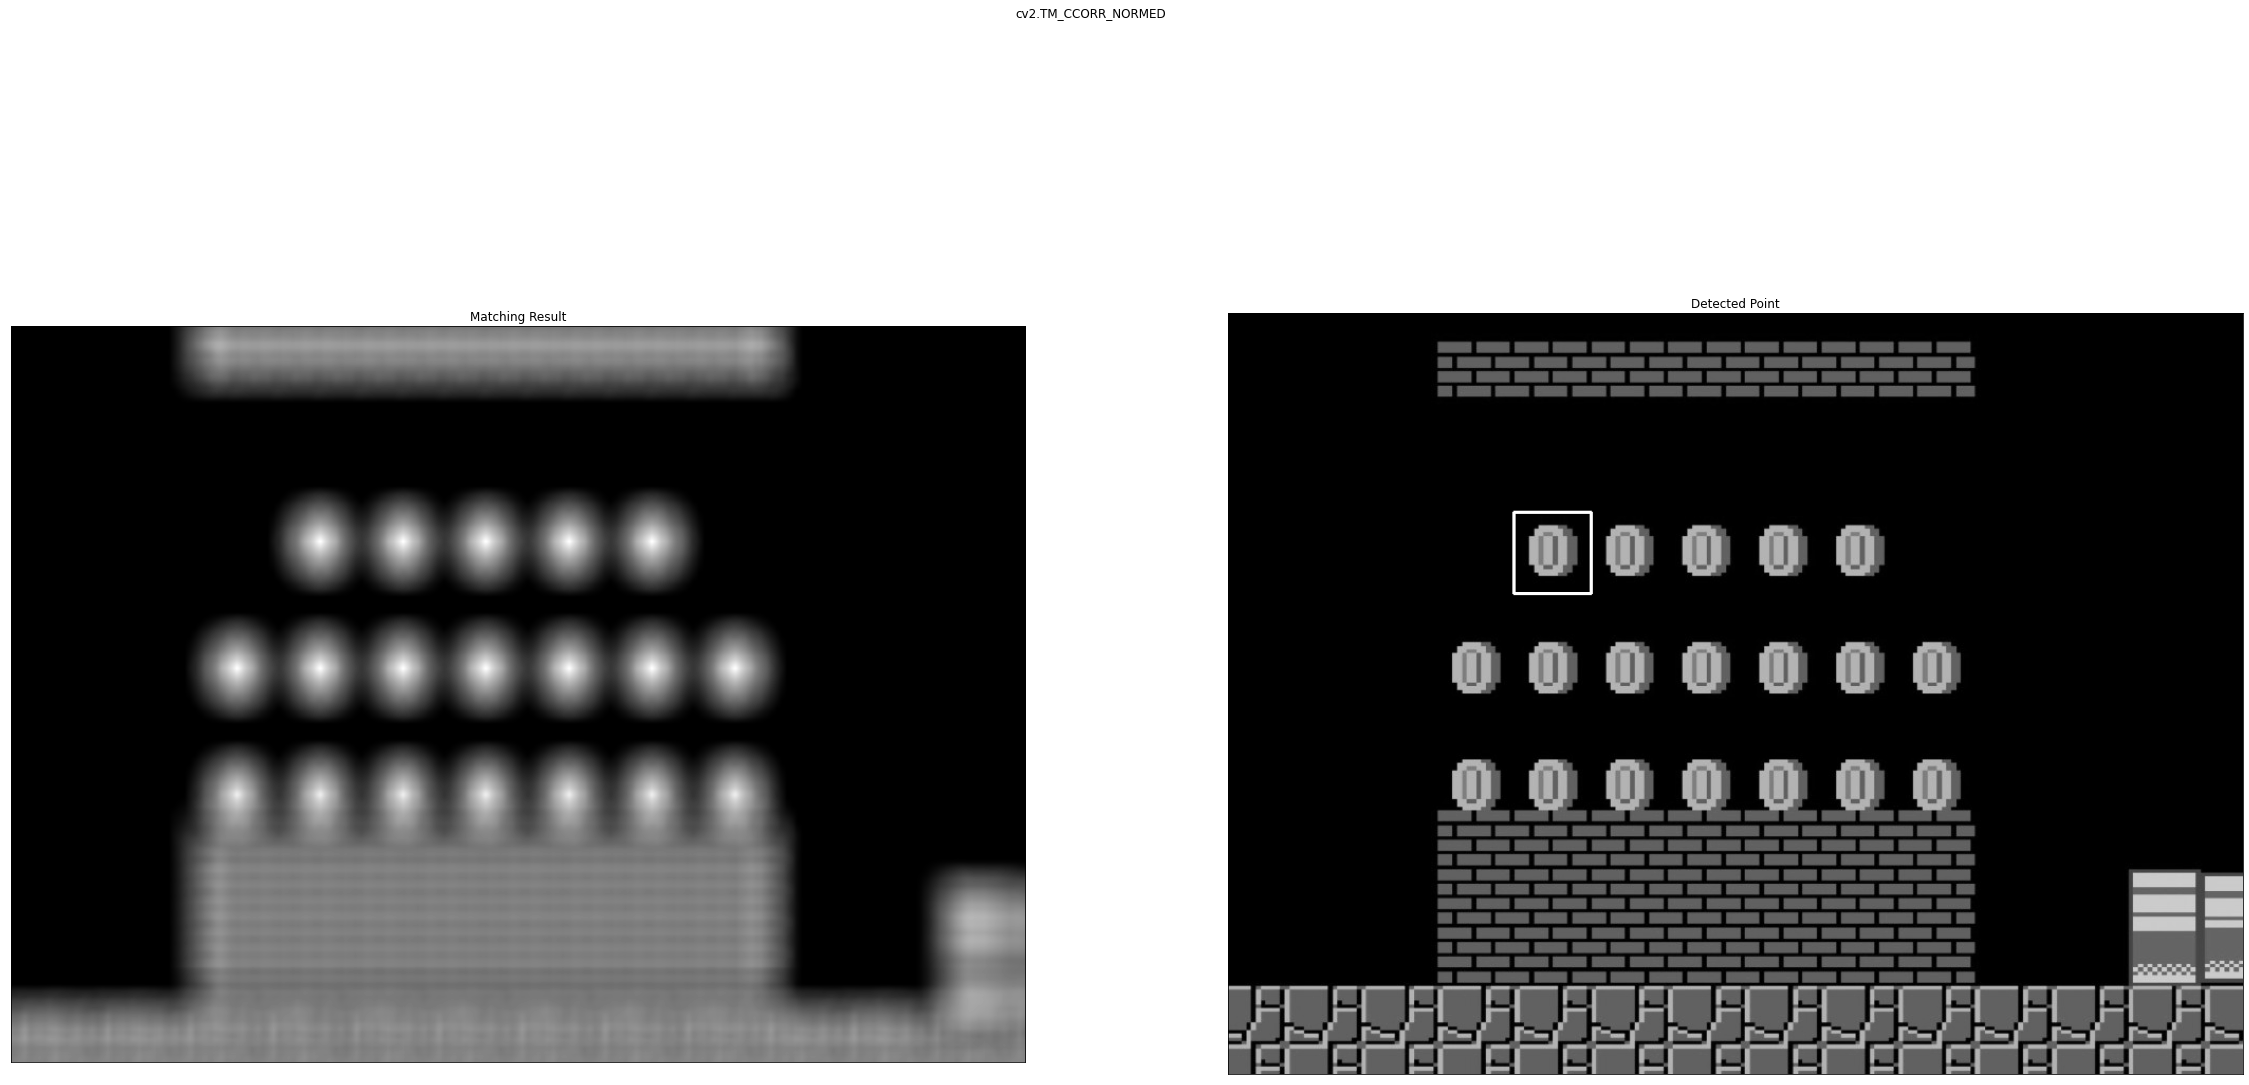

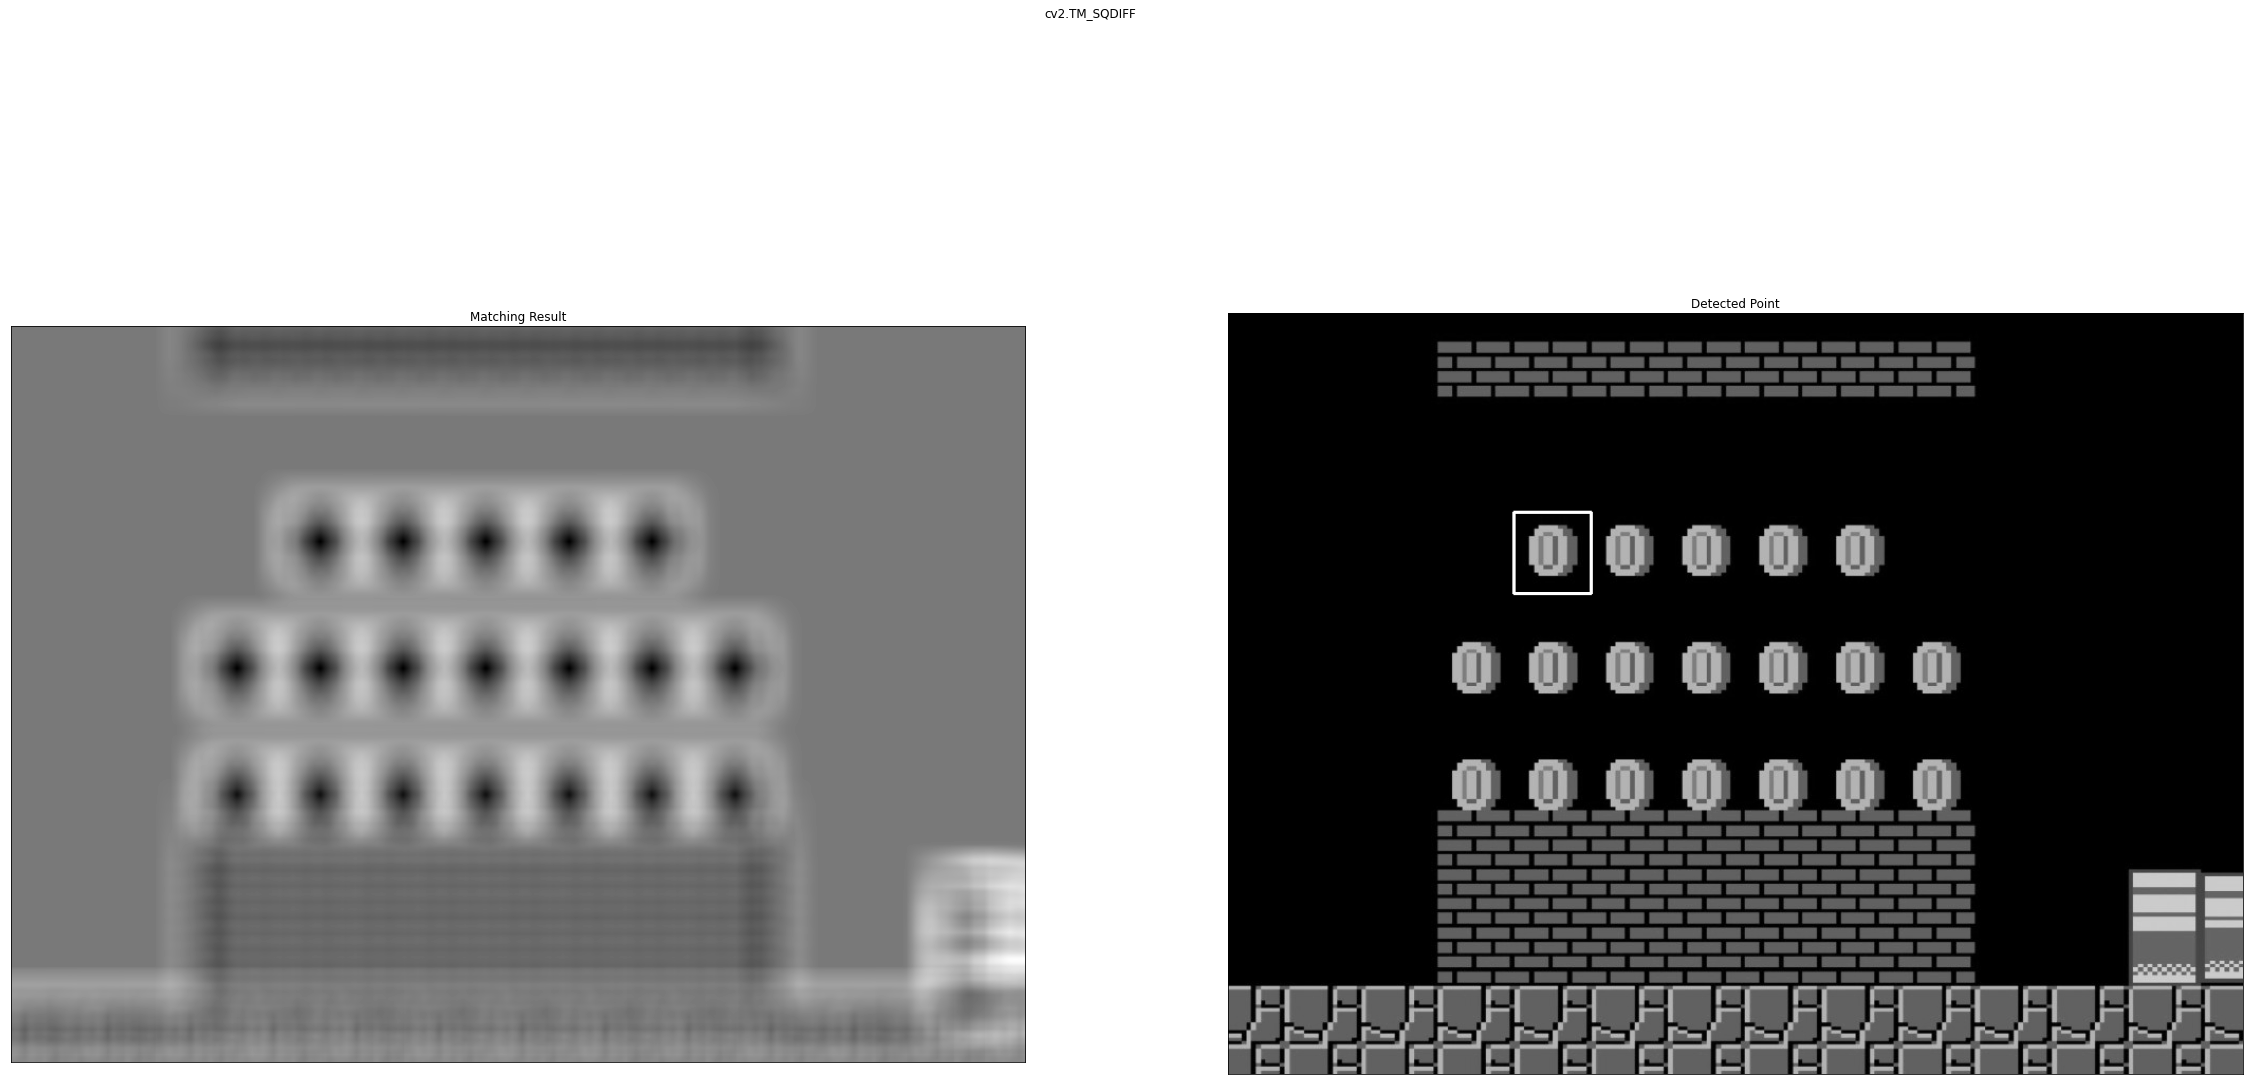

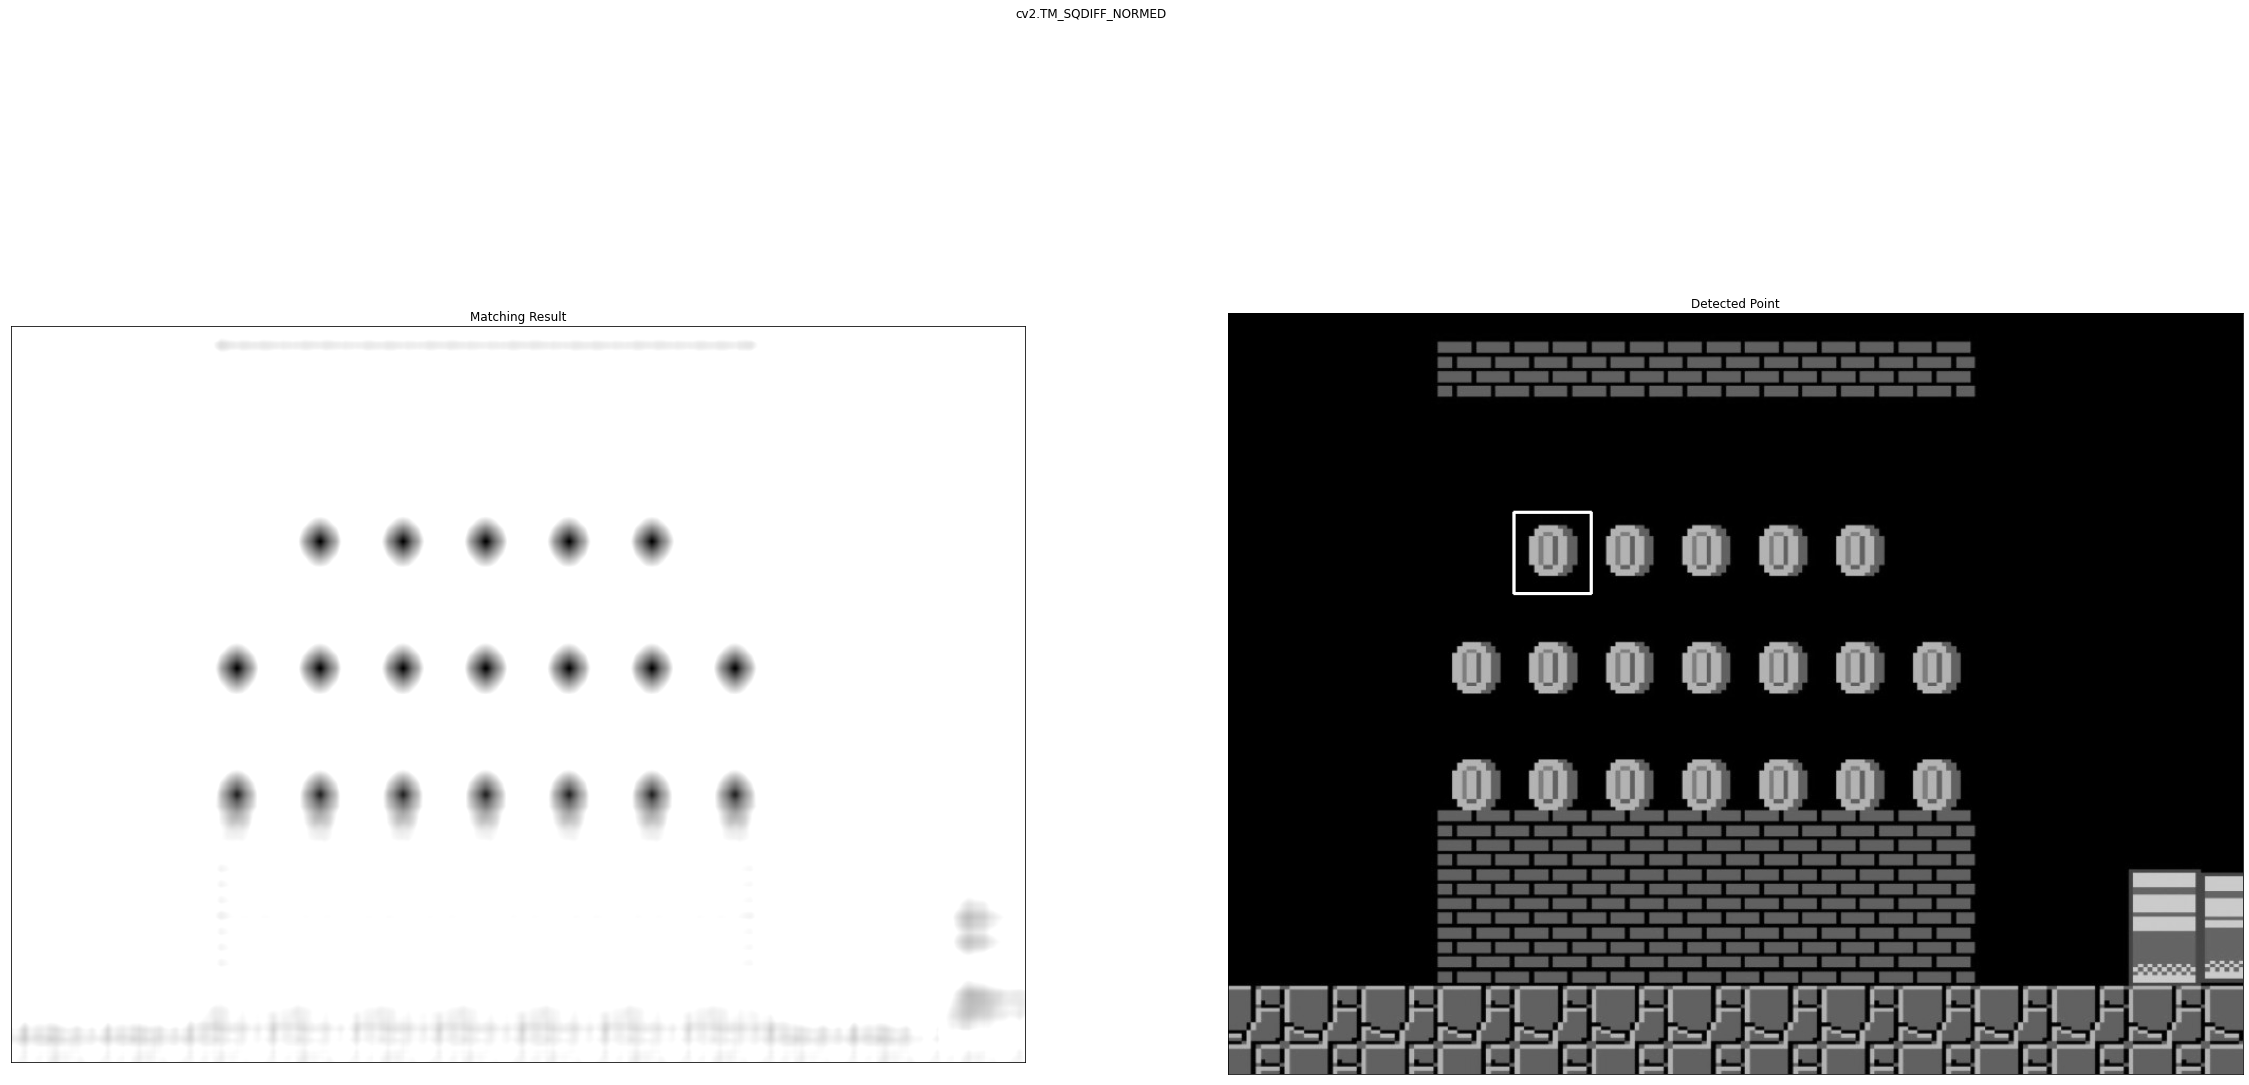

In [3]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.figure(figsize=(40,20))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [4]:
img_rgb = cv2.imread('mario.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
cv2.imshow('img_gray',img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows() 

In [5]:
template = cv2.imread('coin.png',0)
cv2.imshow('coin',template)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
w, h = template.shape[::-1]
print(w,h)

73 77


In [7]:
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED) // cv2.TM_CCOEFF_NORMED

In [8]:
cv2.imshow('res',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
threshold = 0.8
loc = np.where( res >= threshold)

In [12]:
cv2.imwrite('res.png',img_rgb)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 4)
cv2.imshow('dst',img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()